In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
dataset.groupby(['Exited']).count()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Exited,,,,,,,,,,,,,
0,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963
1,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037


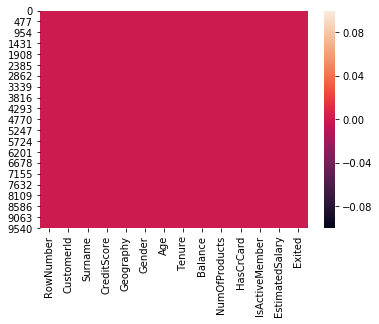

In [6]:
sns.heatmap(dataset.isnull())

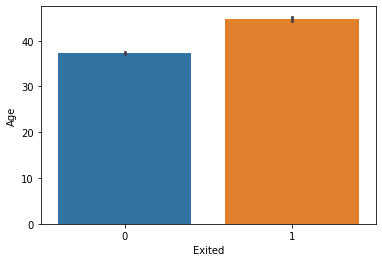

In [7]:
sns.barplot(x='Exited',y='Age',data=dataset)

Countplot Count the Number of occurences.

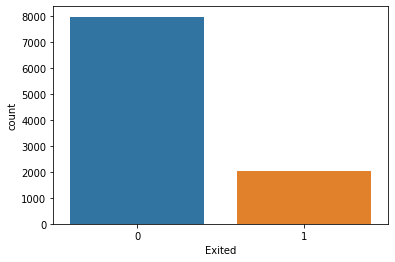

In [8]:
sns.countplot(x='Exited',data=dataset)

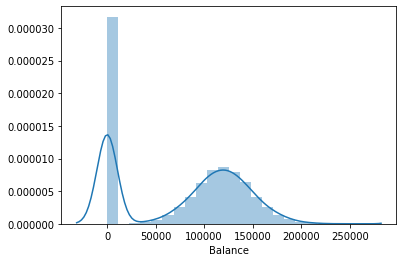

In [9]:
sns.distplot(dataset['Balance'])

In [10]:
dataset.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


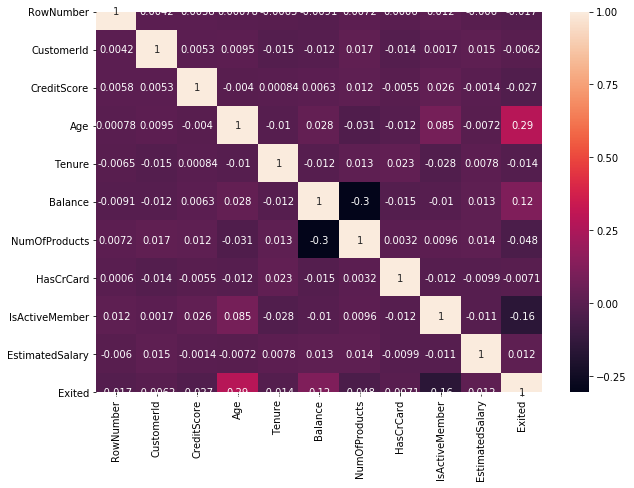

In [11]:
plt.figure(figsize=(10,7))
sns.heatmap(dataset.corr(),annot=True)

In [12]:
print(dataset[['Age','Exited']].corr())

             Age    Exited
Age     1.000000  0.285323
Exited  0.285323  1.000000


In [13]:
dataset['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [14]:
dataset['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [15]:
sex = pd.get_dummies(dataset['Gender'],drop_first=True)
geo = pd.get_dummies(dataset['Geography'],drop_first=True)
geo = pd.get_dummies(dataset['Geography'],drop_first=True)
dataset.drop(['RowNumber','CustomerId','Surname','Geography','Gender'],axis=1,inplace=True)
dataset = pd.concat([sex,geo,dataset],axis=1)

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
Male               10000 non-null uint8
Germany            10000 non-null uint8
Spain              10000 non-null uint8
CreditScore        10000 non-null int64
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(7), uint8(3)
memory usage: 732.5 KB


In [17]:
dataset.head()

,Male,Germany,Spain,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,0,0,619,42,2,0.00,1,1,1,101348.88,1
1,0,0,1,608,41,1,83807.86,1,0,1,112542.58,0
2,0,0,0,502,42,8,159660.80,3,1,0,113931.57,1
3,0,0,0,699,39,1,0.00,2,0,0,93826.63,0
4,0,0,1,850,43,2,125510.82,1,1,1,79084.10,0


In [18]:
X = dataset.drop('Exited', axis=1)
y = dataset['Exited']

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


In [21]:
from sklearn.svm import SVC

In [22]:
model = SVC()
model.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [23]:
predictions = model.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      1628
           1       0.83      0.44      0.57       372

    accuracy                           0.88      2000
   macro avg       0.86      0.71      0.75      2000
weighted avg       0.87      0.88      0.86      2000

[[1594   34]
 [ 210  162]]


-------------------------------------------------------------------------------------------------------------------------------<br>
Classification report:  <br>
Precision = TP / (TP + FP)                                                               [Accuracy of positive prediction] <br>
Recall = TP / (TP + FN)                                                                    [No. of positive cases] <br>
F1-Score = 2 * (Recall * Precision) / (Recall + Precision)                            [what % positive prediction were correct]